In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

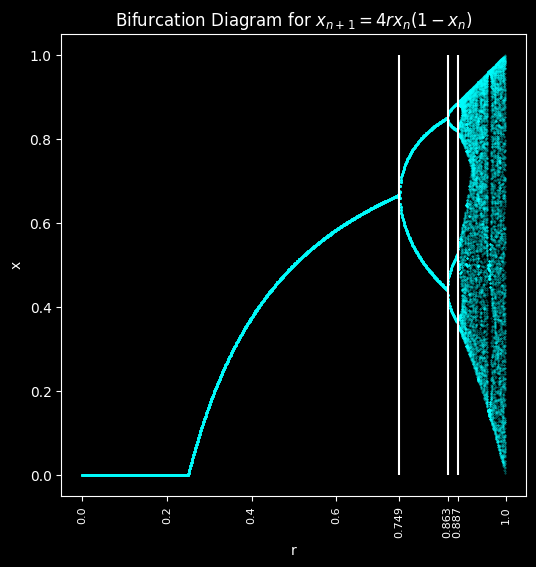

In [25]:
# Number of iterations to be done on the equation:
num_iter = 1000
# Number of points in the end of iterations to be considered for each r:
num_to_plot = 100
r_steps = 0.001
# The initial value for x; since the effect of the initial value will fade after many iterations,
# choosing it deterministically or randomly from the interval (0, 1) should make no difference.
# x0 = np.random.random()
x0 = 0.5
# All the values of x will be stored in this array. It will be updated for each r:
x = np.zeros(num_iter)
x[0] = x0
# The values of r where bifurcation happens will be stored; the corresponding values of x also.
bifurcation_rs = []
bifurcation_xs = []
n = 1
# Initialize the plot:
fig, ax = plt.subplots(figsize=(6,6))

# The main part of the code:
for r in np.arange(0, 1, r_steps):
    for i in range(num_iter-1):
        # The logistic formula:
        x[i+1] = 4 * r * x[i] * (1 - x[i])
    ax.scatter([r]*num_to_plot, x[-1:-num_to_plot-1:-1], marker=".", color="aqua", s=0.5, alpha=0.5)
    # Finding bifurcations to calculate Feigenbaum constants later.
    # This checks the last 20 entries in x, if there are 2, 4, or 8 unique values
    # that keep on repeating, it means these values are the attracting points in the model
    # (to the 3rd decimal, because of the accuracy of r_steps)
    # and so a bifurcation has started from that particular r,
    # thus the value of r, and the corresponding attracting values of x
    # are recorded to be used in calculating delta and alpha later on.
    if (n<=3) and (np.unique(np.round(x[-1:-21:-1], 3)).size == 2**n):
        bifurcation_xs.append(np.unique(np.round(x[-1:-21:-1], 3)))
        bifurcation_rs.append(r)
        n += 1


ax.set_title("Bifurcation Diagram for $x_{n+1} = 4rx_n(1-x_n)$")
ax.set_xlabel("r")
ax.set_ylabel("x")
ax.vlines(bifurcation_rs, ymin=0, ymax=1)
ax.set_xticks([0, 0.2, 0.4, 0.6, 1] + list(bifurcation_rs))
ax.set_xticklabels(ax.get_xticks(), rotation=90, fontsize=8);

In [26]:
# fig.savefig("LogisticMap.jpg")

$\Large Feigenbaum \ Constants \ \delta \ and \ \alpha$

In [21]:
Feigenbaum_delta = (bifurcation_rs[1] - bifurcation_rs[0]) / (bifurcation_rs[2] - bifurcation_rs[1])

length_of_first_tine = bifurcation_xs[1][2:4].mean() - bifurcation_xs[1][0:2].mean()
length_of_second_tine = bifurcation_xs[2][2:4].mean() - bifurcation_xs[2][0:2].mean()

Feigenbaum_alpha = length_of_first_tine / length_of_second_tine

print(f"Feigenbaum Delta is: {Feigenbaum_delta}\nFeigenbaum Alpha is: {Feigenbaum_alpha}")

Feigenbaum Delta is: 4.749999999999996
Feigenbaum Alpha is: 2.5514018691588776


In [22]:
print(f"The Relative Errors with Respect to Wikipedia are:\n{(abs(4.669 - Feigenbaum_delta) / 4.669 * 100):.3f} %\n{(abs(2.503 - Feigenbaum_alpha) / 2.503 * 100):.3f} %")

The Relative Errors with Respect to Wikipedia are:
1.735 %
1.934 %
